# Compute performance metrics for the given Y and Y_score without sklearn

In [0]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

Confusion matrix :  [[0, 0], [100, 10000]]
Precision :  0.9900990099009901
Recall :  1.0
F1-Score :  0.9950248756218906
Accuracy :  0.9900990099009901
AUC-Score :  0.48829900000000004


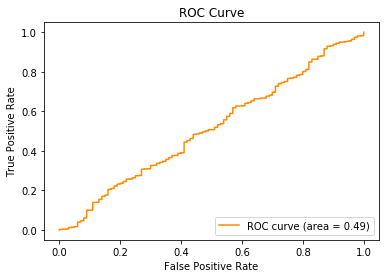

In [21]:
# write your code here
data = pd.read_csv('5_a.csv')

# appending new data frame y_ as predicted values from probability score
list1 = np.zeros(data.shape[0])

idx = 0
for index, row in data.iterrows():
    if row['proba'] >= 0.5:
        list1[idx] = 1
    idx += 1

data['y_'] = list1

# new dataframe with only y and y_
df = data[['y', 'y_']]

# computing confusion matrix
def compute_metrics(dataF):
    TP = TN = FP = FN = 0
    for index, row in dataF.iterrows():
        actual = int(row['y'])
        pred = int(row['y_'])

        if actual == 0 and pred == 0:
            TN += 1
        elif actual == 0 and pred == 1:
            FP += 1
        elif actual == 1 and pred == 0:
            FN += 1
        elif actual == 1 and pred == 1:
            TP += 1

    confusion_matrix = []
    TN_FN = [TN] + [FN]
    confusion_matrix.append(TN_FN)
    FP_TP = [FP] + [TP]
    confusion_matrix.append(FP_TP)
    
    precision = 0
    recall = 0
    f1_score = 0
    accuracy = 0
    if TP > 0:
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
    if precision > 0 and recall > 0:
        f1_score = (2 * (precision * recall)) / (precision + recall)
    if TP > 0 or TN > 0:    
        accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return confusion_matrix, precision, recall, f1_score, accuracy


confusion_matrix, precision, recall, f1_score, accuracy = compute_metrics(df)

print("Confusion matrix : ", confusion_matrix)
print("Precision : ", precision)
print("Recall : ", recall)
print("F1-Score : ", f1_score)
print("Accuracy : ", accuracy)

# sorting dataframe according to proba column in ascending order
data.sort_values("proba", axis=0, ascending=True, inplace=True)

# computing tpr and fpr
def compute_tpr_fpr(data, tpr_list, fpr_list):
    # reference from https://stackoverflow.com/questions/59863061/why-is-my-roc-curve-getting-plotted-in-reverse
    for i in range(len(data)):
        TP = TN = FP = FN = 0
        data['y_pred'] = np.where(data['proba']<=data.iloc[i][1],0,1)
        
        TN = len(data[(data['y'] == 0) & (data['y_pred'] == 0)])
        FN = len(data[(data['y'] == 1) & (data['y_pred'] == 0)])
        FP = len(data[(data['y'] == 0) & (data['y_pred'] == 1)])
        TP = len(data[(data['y'] == 1) & (data['y_pred'] == 1)])
        
        tpr_val = 0
        fpr_val = 0
        if TP > 0:
            tpr_val = TP/(FN+TP)
        if TN > 0:
            fpr_val = TN/(FP+TN)

        tpr_list.append(tpr_val)
        fpr_list.append(fpr_val)

    return np.array(tpr_list), np.array(fpr_list)

tpr_list = []
fpr_list = []

TPR, FPR = compute_tpr_fpr(data, tpr_list, fpr_list)

# computing auc score
auc_score = np.trapz(TPR,FPR)
print("AUC-Score : ", auc_score)

# plot roc curve
def plot_roc(TPR, FPR, auc_score):  
    plt.figure()
    plt.plot(FPR, TPR, color='darkorange',
            label='ROC curve (area = %0.2f)' % auc_score)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc=4)
    plt.show()

import matplotlib.pyplot as plt
plot_roc(1-TPR, FPR, auc_score)


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

Confusion matrix :  [[9761, 45], [239, 55]]
Precision :  0.1870748299319728
Recall :  0.55
F1-Score :  0.2791878172588833
Accuracy :  0.9718811881188119
AUC-Score :  0.937657


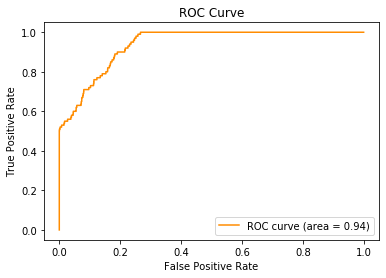

In [22]:
# write your code
data1 = pd.read_csv('5_b.csv')

# appending new data frame y_ as predicted values from probability score
list1 = np.zeros(data1.shape[0])

idx = 0
for index, row in data1.iterrows():
    if row['proba'] >= 0.5:
        list1[idx] = 1
    idx += 1

data1['y_'] = list1

# new dataframe with only y and y_
df1 = data1[['y', 'y_']]

# computing metrics
confusion_matrix1, precision1, recall1, f1_score1, accuracy1 = compute_metrics(df1)

print("Confusion matrix : ", confusion_matrix1)
print("Precision : ", precision1)
print("Recall : ", recall1)
print("F1-Score : ", f1_score1)
print("Accuracy : ", accuracy1)

# sorting dataframe according to proba column in ascending order
data1.sort_values("proba", axis=0, ascending=True, inplace=True)

tpr_list1 = []
fpr_list1 = []

# computing tpr and fpr
TPR1, FPR1 = compute_tpr_fpr(data1, tpr_list1, fpr_list1)

# computing auc score
auc_score1 = np.trapz(TPR1,FPR1)
print("AUC-Score : ", auc_score1)

# plotting the roc curve based on tpr and fpr list
plot_roc(TPR1, 1-FPR1, auc_score1)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [26]:
data2 = pd.read_csv('5_c.csv')   

# sort according to prob column
data2.sort_values(["prob"], inplace=True)

A = 0
flag = 0 
best_threshold_value = 0

for i in range(len(data2)):
    FP = FN = 0
    data2['y_'] = np.where(data2['prob']<=data2.iloc[i][1],0,1)
      
    FN = len(data2[(data2['y'] == 1) & (data2['y_'] == 0)])
    FP = len(data2[(data2['y'] == 0) & (data2['y_'] == 1)])
        
    value = int(500 * FN) + int(100 * FP)
        
    if flag == 0 or value < A:
        A = value
        best_threshold_value = data2['prob'][i]
        flag = 1

print("Final value of A : ", A)
print("Best threshold value : ", best_threshold_value)


Final value of A :  141000
Best threshold value :  0.25002762775968856


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [27]:
# write your code
data3 = pd.read_csv('5_d.csv')   
data3

# mse = (np.square(data3['y'] - data3['pred'])).mean(axis=0)
# print(mse)

# calculating mean squared error
error = 0
for i in range(data3.shape[0]):
    error += ((data3['y'][i] - data3['pred'][i]) * (data3['y'][i] - data3['pred'][i]))

mse = error / data3.shape[0]
print("Mean squared error : ", mse)

# computing MAPE
mape = 0
error1 = 0
actual = 0
for i in range(data3.shape[0]):
    error1 += abs(data3['y'][i] - data3['pred'][i])
    actual += data3['y'][i]
    
mape = error1 / actual
print("MAPE : ", mape)


#compute ss_total
mean_y = np.mean(data3['y'][i])
#print(mean_y)

error2 = 0
for i in range(data3.shape[0]):
    error2 += ((data3['y'][i] - mean_y) * (data3['y'][i] - mean_y))
ss_total = error2 / data3.shape[0]

# compute ss_residue
error3 = 0
for i in range(data3.shape[0]):
    error3 += ((data3['y'][i] - data3['pred'][i]) * (data3['y'][i] - data3['pred'][i]))
ss_res = error3 / data3.shape[0]

# compute r_square
r2 = 1 - (ss_res / ss_total)
print("R_square : ", r2)

Mean squared error :  177.16569974554707
MAPE :  0.1291202994009687
R_square :  0.958489782478721
